## Low-modularity example: out-of-the-box use

A low degree of modularity means using the package as it comes, ’out of the box’, using a combination of the modules as they come with the user’s installation of defSim. The example code given in this notebook runs a small experiment with a bounded confidence model on a wrapped lattice network, varying the communication regime. It combines the conception of opinions as one-dimensional continuous objects (Deffuant et al. 2002) with the idea that in some contexts (e.g. on social networking platforms) individuals communicate to all their contacts at once rather than on a purely dyadic basis (Keijzer et al. 2018). 

Both models run for 10,000 iterations and are repeated 20 times. The code returns a pandas data frame,
here called ’my_results’ that contains the basic model settings and a set of standard output measures that summarize the model after convergence.

A summary of two of those output measures is given in the figure below where homogeneity (i.e. the size of the biggest cluster of similar agents over the total number of agents) and the average distance between agents are plotted for the different communication regimes. We see that when agents influence all their neighbors at once the largest opinion cluster at the end of the run is much larger than when agents communicate at a one-to-one basis. All the while, the average opinion distance between agents remains at asimilar level between the two experimental conditions, indicating that the level of disagreement on the graph remains roughly the same.

In [1]:
import defSim as ds
import matplotlib.pyplot as plt
import numpy as np

### The Experiment class

Here, we use the Experiment class to run a bounded confidence model on a grid, varying the communication regime. At each timestep, a randomly drawn agent will send his opinion to one (one-to-one) or all (one-to-many) of its neighbors. The agent who receives the opinion decides to adopt - moving towards the sending agent's opinion - or reject the opinion based on whether their difference is smaller than the confidence level. In the example below, the confidence level is set to 0.25.

All parameters are set to one value, except the communication_regime parameter. This parameter receives a list and automatically converts this list to two conditions. Each condition is run as many times as is passed to the repetitions parameter.

In [2]:
my_experiment = ds.Experiment(seed=314,
                              influence_function="bounded_confidence",
                              attributes_initializer="random_continuous",
                              attribute_parameters={"num_features": 1},
                              dissimilarity_measure="euclidean",
                              topology="grid",
                              network_parameters={'num_agents': 49,
                                                  "neighborhood": "moore"},
                              influence_parameters={"confidence_level": .25},
                              communication_regime=['one-to-one', 'one-to-many'],
                              max_iterations=10000,
                              repetitions=20)

In [3]:
my_results = my_experiment.run(parallel=True)


40 different parameter combinations


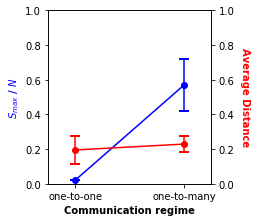

In [4]:
fig, ax1 = plt.subplots(figsize=[3,3])

plt.tight_layout()

x = ['one-to-one', 'one-to-many']
y = [sum(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'Homogeneity']) / 20,
     sum(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'Homogeneity']) / 20]
e = [np.std(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'Homogeneity']),
     np.std(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'Homogeneity'])]

ax1.errorbar(x, y, e,
             marker='o',
             color='b',
             capsize=5,
             capthick=2)
ax1.set_ylim(0, 1)
ax1.set_xlim(-0.25, 1.25)
plt.xlabel('Communication regime', fontweight='bold')
plt.ylabel(r'$S_{max}$ / $N$', fontweight='bold', color='blue')

ax2 = ax1.twinx()
x2 = ['one-to-one', 'one-to-many']
y2 = [sum(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'AverageDistance']) / 20,
     sum(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'AverageDistance']) / 20]
e2 = [np.std(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'AverageDistance']),
     np.std(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'AverageDistance'])]
plt.errorbar(x2, y2, e2,
             marker='o',
             color='r',
             capsize=5,
             capthick=2)
ax2.set_ylim(0, 1)
plt.ylabel('Average Distance', fontweight='bold', color='red', rotation=-90, labelpad=16)

#plt.savefig('/Users/marijnkeijzer/Desktop/lowmodularity.png', dpi=144, bbox_inches='tight')

plt.show()
